This notebook showcases the  Lazy Exoplanet Operations (LEO) vetter. It is an exovetter implementation of parts of full LEO-vetter tool written by Michelle Kunimoto available at https://github.com/mkunimoto/LEO-vetter

Currently it contains the SES and MES metrics, as well as the results of the Rubble and Chases tests. **Still kind of confused as to what those are**

In [1]:
from exovetter.tce import Tce
import lightkurve as lk
from exovetter import vetters as vet
import matplotlib.pyplot as plt
%matplotlib inline

Exovetter vetting alogrithms use TCE and lightkurve objects as input, the following TCE and light curve files were made for the known planet WASP-18 b in the TCE and lightcurves notebooks. 

In [2]:
# WASP-18 b TCE:
tce = Tce.from_json('wasp18b_tce')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 58374.669883 d>,
 'epoch_offset': <Quantity -2400000.5 d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'snr': 50,
 'event_name': 'WASP-18 b',
 'target_name': 'WASP-18'}

<Figure size 640x480 with 0 Axes>

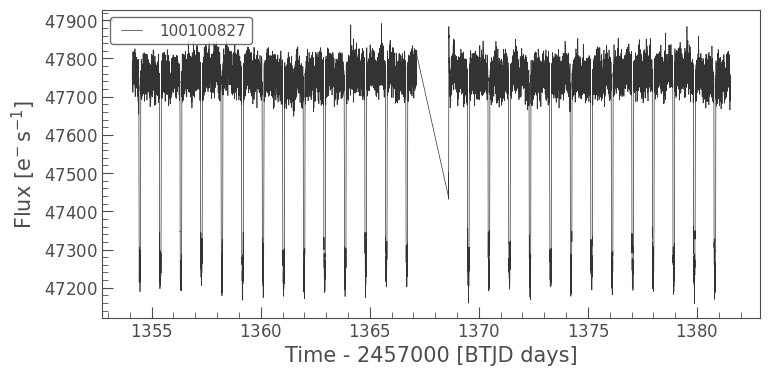

In [3]:
# Cleaned WASP-18 b lightkurve object
lc = lk.read('wasp18b.fits')

# plot light curve
plt.figure()
lc.plot()
plt.show()

Vetters are run by first creating an instance of the vetter object in order to specify parameters to desired values then running the object to obtain the results. Here we use the default options (hence the lack of arguments to `vet.TransitPhaseCoverage`). 

In order to run the initialized vetter we use the `run` method which takes a TCE and a lightkurve object as inputs. This returns a dictionary of results.

In [4]:
leo_instance = vet.LeoVetter()
leo_results = leo_instance.run(tce, lc)

leo_results

with epoch= 58374.6698830002 d and epoch_offset= -2400000.5 d
offset subtracted to get  2458375.169883 d
with offset= -2457000.0 d added to this new epoch  2458375.169883 d  to get  1375.1698830001988 d  the final returned epoch
No flux error given, defaulting to 'flux_err' column of light curve


/Users/mdallas/miniconda3/envs/exovetter_06_08/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/mdallas/miniconda3/envs/exovetter_06_08/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


{'sig_w': <Quantity 27.81302114>,
 'sig_r': 9.540442954857065,
 'err': <Quantity 1.92454874>,
 'MES': <Quantity 229.74947453>,
 'SHP': 0.01909245908449668,
 'CHI': <Quantity 378.0940735>,
 'med_chases': 1.0,
 'mean_chases': 1.0,
 'max_SES': 45.466658249021336,
 'DMM': 0.9845118835555174}

In Transit Phase Coverage, the results are as follows: "**The blank ones I still am confused about"**
* sig_w : White noise following Hartman & Bakos (2016)
* sig_r : Red noise following Hartman & Bakos (2016)
* err : Signal-to-pink-noise following Pont et al. (2006)
* MES : Multiple Event Statistic calculated from mean depth of in transit points
* SHP : MES shape metric
* CHI : 
* med_chases : median of chases
* mean_chases : mean of chases
* max_SES : maximum of SES
* DMM           

The following attributes are also available after running the vetter object:
* MES_series : dep_series/err_series 
* N_transit : Number of transits
* SES : Single Event Statistic
* SES_series : Single Event Statistic series for every timestamp
* chases : range for chases metric is between 1.5 transit durations and user specified max_chases_phase
* err_series : Error of MES
* rubble : rubble statistic

There is currently no diagnostic plots implemented into the LEO vetter